
## Dataset

Food-101 dataset (https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/), a collection of 101 different categories of 101,000 (1000 images per category) real-world images of food dishes.

Starting with just 2-categories:  pizza_steak subset

In [ ]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-12-27 18:57:31--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.163.207, 142.251.167.207, 172.253.115.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.163.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   138MB/s    in 0.8s    

2023-12-27 18:57:32 (138 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/steak/

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [ ]:

import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [ ]:
# Another way to find out how many images are in a directory
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [ ]:
# Get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


## Check the data/images

In [ ]:
# View image (randomly from the all of the images)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


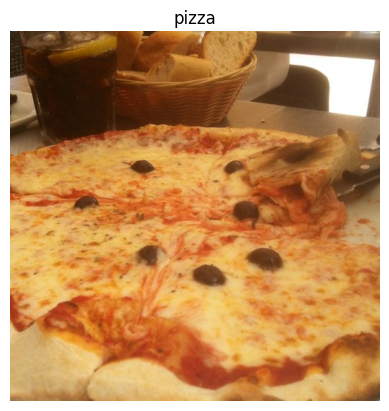

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

# Build a starting model
* Preprocess/normalize the data
* Tranform the data into batches (only a subset of images will be processed at a time, a typical batch size is 32)
* Model Architecture
* Compile the model
* Fit the data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:


# CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 14s 150ms/step - loss: 0.6367 - accuracy: 0.6353 - val_loss: 0.4498 - val_accuracy: 0.8140
Epoch 2/5
47/47 [==============================] - 7s 143ms/step - loss: 0.4823 - accuracy: 0.7880 - val_loss: 0.4190 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 7s 148ms/step - loss: 0.4510 - accuracy: 0.8020 - val_loss: 0.4267 - val_accuracy: 0.8160
Epoch 4/5
47/47 [==============================] - 6s 119ms/step - loss: 0.4044 - accuracy: 0.8167 - val_loss: 0.3505 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 7s 151ms/step - loss: 0.3582 - accuracy: 0.8513 - val_loss: 0.3607 - val_accuracy: 0.8500


In [ ]:
# Check out the layers in our model
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_6 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_8 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                 

<Axes: >

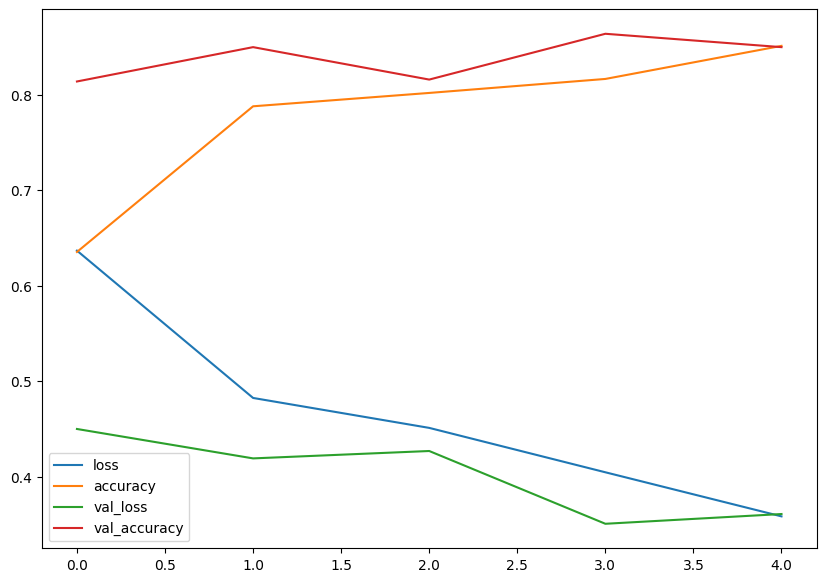

In [ ]:
# Evaluate the model
import pandas as pd
pd.DataFrame(history_1.history).plot(figsize=(10,7))

In [ ]:
# overfitting starts to occur

# To reduce it consider data augmentation, adding regularization layers (such as MaxPool2D), add more data,...

In [ ]:
# change the architecture

model_2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

In [ ]:
# Compile the model
model_2.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 126ms/step - loss: 0.6242 - accuracy: 0.6633 - val_loss: 0.4919 - val_accuracy: 0.7660
Epoch 2/5
47/47 [==============================] - 7s 160ms/step - loss: 0.4774 - accuracy: 0.7833 - val_loss: 0.4602 - val_accuracy: 0.7660
Epoch 3/5
47/47 [==============================] - 5s 114ms/step - loss: 0.4508 - accuracy: 0.7993 - val_loss: 0.3887 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 7s 139ms/step - loss: 0.4273 - accuracy: 0.8173 - val_loss: 0.3731 - val_accuracy: 0.8400
Epoch 5/5
47/47 [==============================] - 5s 113ms/step - loss: 0.3962 - accuracy: 0.8333 - val_loss: 0.3465 - val_accuracy: 0.8380


In [ ]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 26, 26, 10)       

<Axes: >

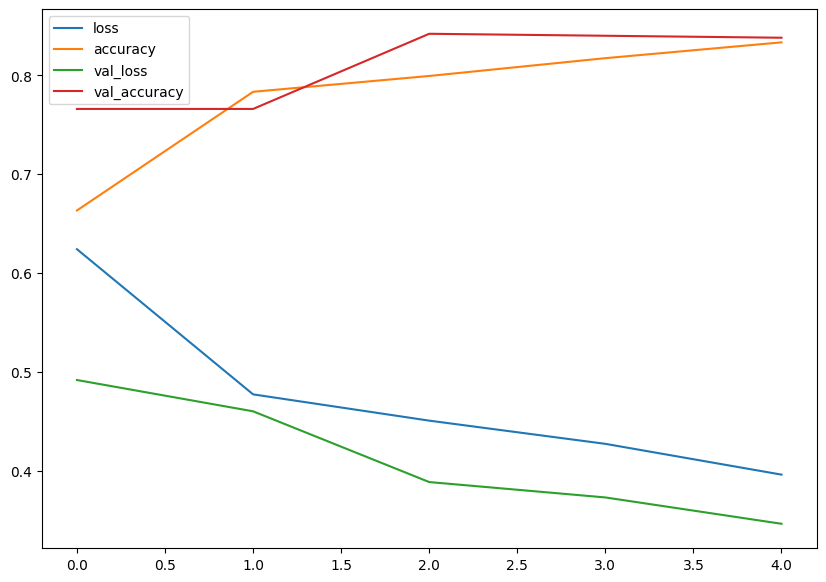

In [ ]:
# Evaluate the model
pd.DataFrame(history_2.history).plot(figsize=(10,7))

In [ ]:
# image augmentation with ImageDataGenerator
# Data augmentation usually only performed in the training data. Using ImageDataGenerator built-in data augmentation parameters the image is left unmodified in the directories but is modified as its loaded into the model
train_datagen_augmented = ImageDataGenerator(rescale=1./255,
                                             rotation_range=0.2,
                                             shear_range = 0.2,
                                             zoom_range=0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2,
                                             horizontal_flip = True)

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Import data from directories and turn them into batches
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary",
                                               shuffle=False)# Don't shuffle for demonstration purposes

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')



Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [ ]:
# sample augmented data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()


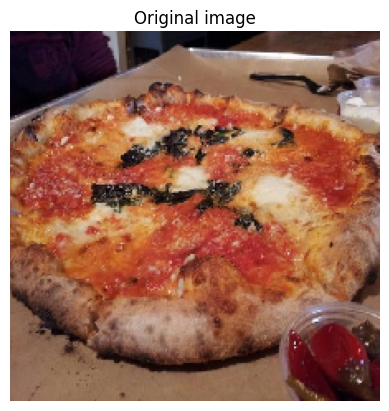

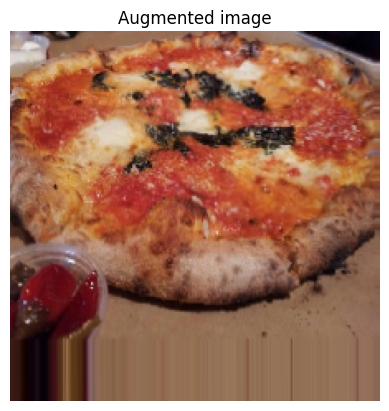

In [ ]:
# Check augmented vs non-augmented
random_number = random.randint(0, 31) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [ ]:
model_3 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])


# Compile the model
model_3.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 444ms/step - loss: 0.7679 - accuracy: 0.4607 - val_loss: 0.6868 - val_accuracy: 0.6420
Epoch 2/5
47/47 [==============================] - 23s 471ms/step - loss: 0.7127 - accuracy: 0.5647 - val_loss: 0.6856 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 23s 482ms/step - loss: 0.7059 - accuracy: 0.5353 - val_loss: 0.6847 - val_accuracy: 0.6040
Epoch 4/5
47/47 [==============================] - 29s 617ms/step - loss: 0.6928 - accuracy: 0.5300 - val_loss: 0.6805 - val_accuracy: 0.6580
Epoch 5/5
47/47 [==============================] - 32s 688ms/step - loss: 0.6917 - accuracy: 0.5873 - val_loss: 0.6711 - val_accuracy: 0.7380


In [ ]:
model_3.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 111, 111, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_33 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 54, 54, 10)        0         
 ng2D)                                                           
                                                                 
 conv2d_34 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 26, 26, 10)       

<Axes: >

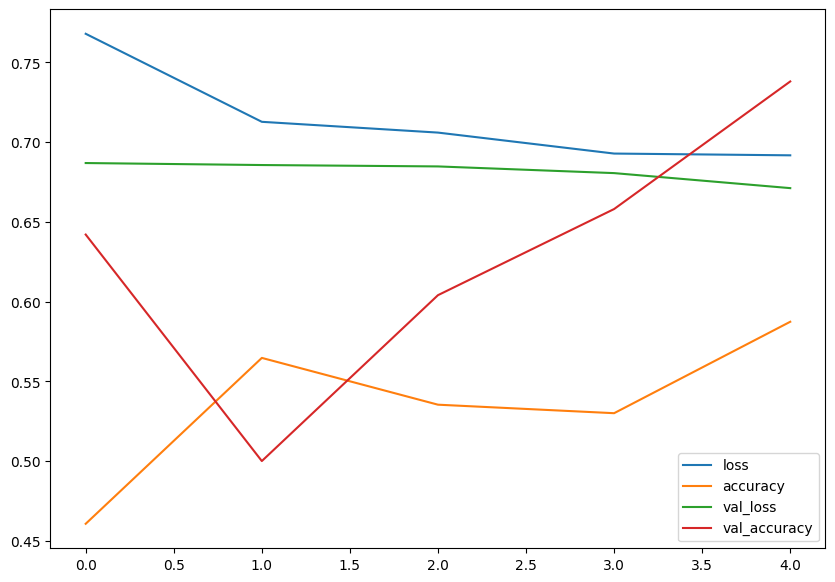

In [ ]:
# Evaluate the model
pd.DataFrame(history_3.history).plot(figsize=(10,7))

In [ ]:
# Repeat having the images shuffled.

train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary",
                                               shuffle=True)


Found 1500 images belonging to 2 classes.


In [ ]:
model_4 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])


# Compile the model
model_4.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_4 = model_4.fit(train_data_augmented_shuffled ,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 451ms/step - loss: 0.6561 - accuracy: 0.5933 - val_loss: 0.4851 - val_accuracy: 0.8100
Epoch 2/5
47/47 [==============================] - 22s 472ms/step - loss: 0.5304 - accuracy: 0.7500 - val_loss: 0.3938 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 22s 465ms/step - loss: 0.4842 - accuracy: 0.7800 - val_loss: 0.3623 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 21s 449ms/step - loss: 0.4886 - accuracy: 0.7733 - val_loss: 0.3617 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 22s 464ms/step - loss: 0.4796 - accuracy: 0.7760 - val_loss: 0.3613 - val_accuracy: 0.8180


<Axes: >

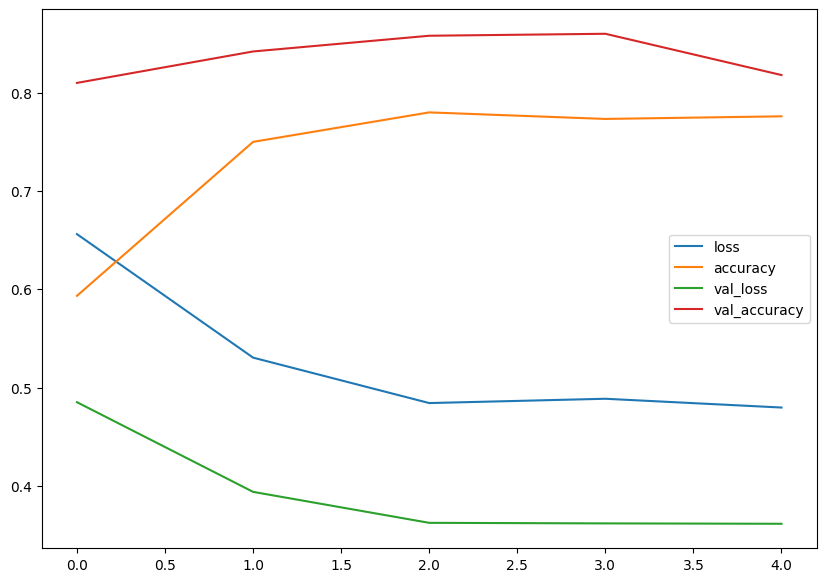

In [ ]:
pd.DataFrame(history_4.history).plot(figsize=(10,7))

The performance on the training dataset improves almost immediately compared to model_3. The only difference was changing the shuffle to True



In [ ]:
# Go back to the initial model and fit the train_data_augmented
history_5 = model_1.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 21s 450ms/step - loss: 0.5001 - accuracy: 0.7680 - val_loss: 0.3392 - val_accuracy: 0.8620
Epoch 2/5
47/47 [==============================] - 23s 497ms/step - loss: 0.4471 - accuracy: 0.8053 - val_loss: 0.2992 - val_accuracy: 0.8780
Epoch 3/5
47/47 [==============================] - 23s 488ms/step - loss: 0.4224 - accuracy: 0.8127 - val_loss: 0.3071 - val_accuracy: 0.8880
Epoch 4/5
47/47 [==============================] - 24s 508ms/step - loss: 0.4416 - accuracy: 0.8000 - val_loss: 0.3119 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 23s 479ms/step - loss: 0.4267 - accuracy: 0.8167 - val_loss: 0.3146 - val_accuracy: 0.8600


<Axes: >

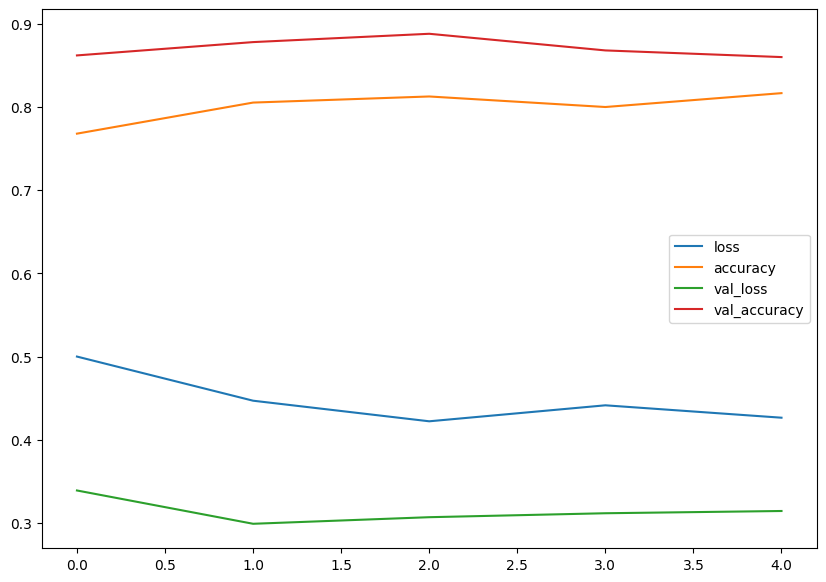

In [ ]:
pd.DataFrame(history_5.history).plot(figsize=(10,7))

In [ ]:

# Adding one Conv2D and MaxPool2D at the end

model_6 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])


# Compile the model
model_6.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 474ms/step - loss: 0.6908 - accuracy: 0.5233 - val_loss: 0.6760 - val_accuracy: 0.6720
Epoch 2/5
47/47 [==============================] - 23s 487ms/step - loss: 0.6081 - accuracy: 0.6700 - val_loss: 0.4686 - val_accuracy: 0.7540
Epoch 3/5
47/47 [==============================] - 23s 482ms/step - loss: 0.5349 - accuracy: 0.7427 - val_loss: 0.4358 - val_accuracy: 0.8220
Epoch 4/5
47/47 [==============================] - 23s 483ms/step - loss: 0.4979 - accuracy: 0.7560 - val_loss: 0.3852 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 23s 489ms/step - loss: 0.4689 - accuracy: 0.7960 - val_loss: 0.3615 - val_accuracy: 0.8520


<Axes: >

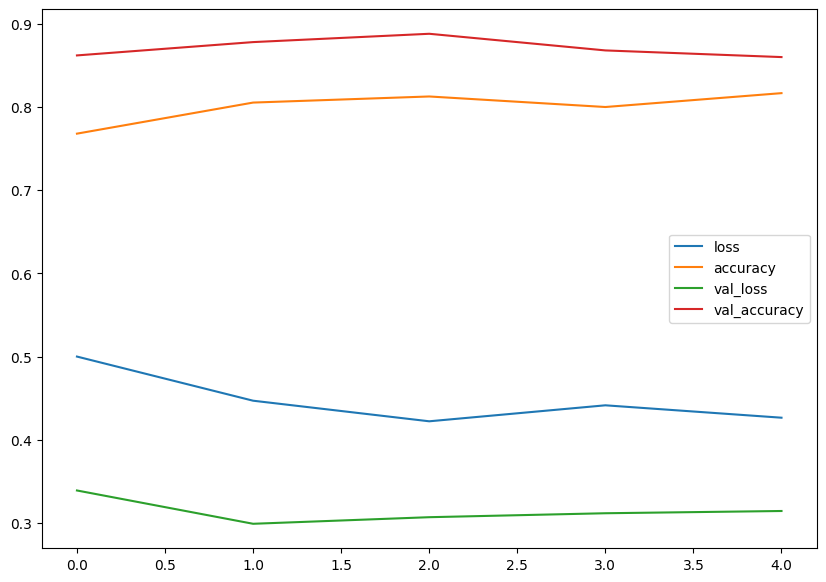

In [ ]:
pd.DataFrame(history_5.history).plot(figsize=(10,7))

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


#changing the learning rate

model_7 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.002),
              metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 114s 2s/step - loss: 0.6859 - accuracy: 0.5527 - val_loss: 0.6845 - val_accuracy: 0.6040
Epoch 2/5
47/47 [==============================] - 104s 2s/step - loss: 0.6287 - accuracy: 0.6580 - val_loss: 0.5826 - val_accuracy: 0.7280
Epoch 3/5
47/47 [==============================] - 103s 2s/step - loss: 0.5785 - accuracy: 0.7040 - val_loss: 0.4458 - val_accuracy: 0.8220
Epoch 4/5
47/47 [==============================] - 104s 2s/step - loss: 0.5325 - accuracy: 0.7387 - val_loss: 0.3405 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 102s 2s/step - loss: 0.4616 - accuracy: 0.7887 - val_loss: 0.3230 - val_accuracy: 0.8600


<Axes: >

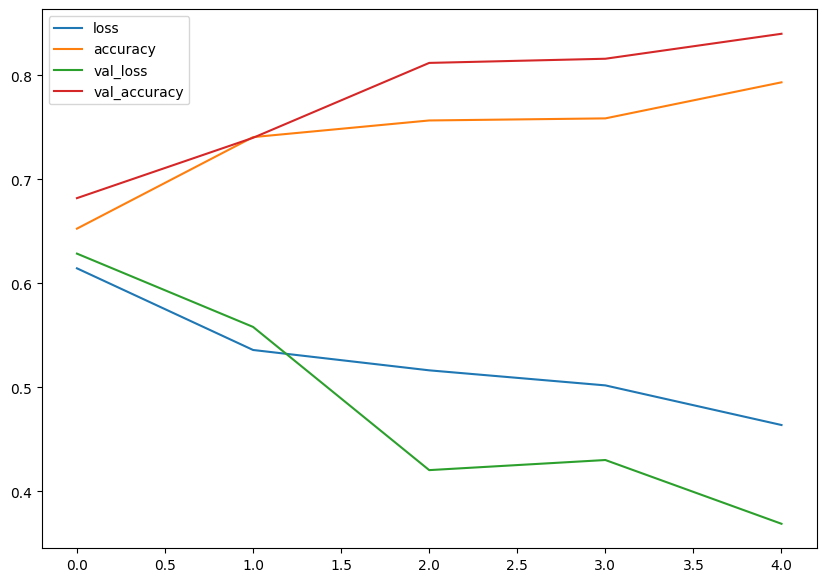

In [ ]:
pd.DataFrame(history_7.history).plot(figsize=(10,7))

In [ ]:
#model_2 with learning rate 0.002

model_8 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])


# Compile the model
model_8.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.002),
              metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))



Epoch 1/5
47/47 [==============================] - 22s 432ms/step - loss: 0.6727 - accuracy: 0.5800 - val_loss: 0.5933 - val_accuracy: 0.6920
Epoch 2/5
47/47 [==============================] - 22s 466ms/step - loss: 0.5746 - accuracy: 0.7247 - val_loss: 0.4006 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 23s 488ms/step - loss: 0.4877 - accuracy: 0.7713 - val_loss: 0.4023 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 21s 456ms/step - loss: 0.5033 - accuracy: 0.7793 - val_loss: 0.3801 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 22s 475ms/step - loss: 0.4633 - accuracy: 0.8033 - val_loss: 0.3482 - val_accuracy: 0.8620


<Axes: >

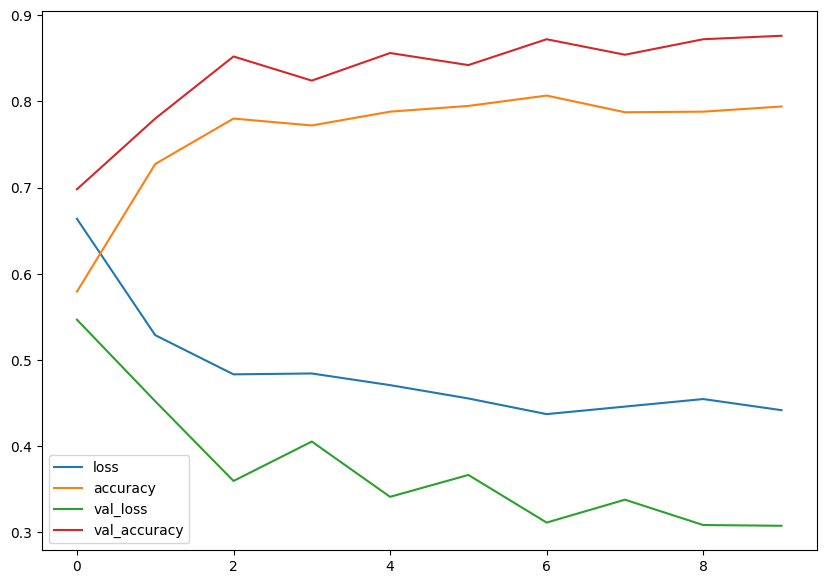

In [ ]:
pd.DataFrame(history_8.history).plot(figsize=(10,7))

In [ ]:

#epochs =10

model_9 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])


# Compile the model
model_9.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_9 = model_9.fit(train_data_augmented_shuffled,
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/10
47/47 [==============================] - 30s 554ms/step - loss: 0.6620 - accuracy: 0.5820 - val_loss: 0.6161 - val_accuracy: 0.6340
Epoch 2/10
47/47 [==============================] - 21s 445ms/step - loss: 0.5854 - accuracy: 0.6920 - val_loss: 0.4325 - val_accuracy: 0.8200
Epoch 3/10
47/47 [==============================] - 22s 479ms/step - loss: 0.5001 - accuracy: 0.7647 - val_loss: 0.4188 - val_accuracy: 0.8220
Epoch 4/10
47/47 [==============================] - 26s 545ms/step - loss: 0.4919 - accuracy: 0.7727 - val_loss: 0.4056 - val_accuracy: 0.8200
Epoch 5/10
47/47 [==============================] - 30s 647ms/step - loss: 0.5043 - accuracy: 0.7667 - val_loss: 0.4001 - val_accuracy: 0.8200
Epoch 6/10
47/47 [==============================] - 22s 459ms/step - loss: 0.4850 - accuracy: 0.7767 - val_loss: 0.3689 - val_accuracy: 0.8480
Epoch 7/10
47/47 [==============================] - 29s 622ms/step - loss: 0.4540 - accuracy: 0.7920 - val_loss: 0.3429 - val_accuracy: 0.8540

<Axes: >

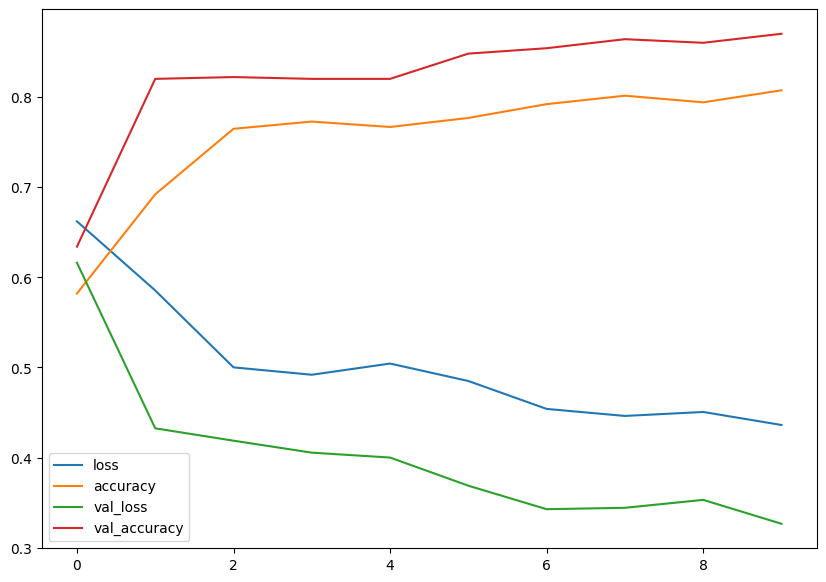

In [ ]:
pd.DataFrame(history_9.history).plot(figsize=(10,7))

Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.
Epoch 1/10
24/24 [==============================] - 8s 267ms/step - loss: 0.6757 - accuracy: 0.5780 - val_loss: 0.6442 - val_accuracy: 0.5720
Epoch 2/10
24/24 [==============================] - 7s 272ms/step - loss: 0.5810 - accuracy: 0.7053 - val_loss: 0.4810 - val_accuracy: 0.7920
Epoch 3/10
24/24 [==============================] - 7s 307ms/step - loss: 0.4819 - accuracy: 0.7780 - val_loss: 0.4380 - val_accuracy: 0.8160
Epoch 4/10
24/24 [==============================] - 6s 261ms/step - loss: 0.4500 - accuracy: 0.8020 - val_loss: 0.3929 - val_accuracy: 0.8260
Epoch 5/10
24/24 [==============================] - 7s 313ms/step - loss: 0.4070 - accuracy: 0.8207 - val_loss: 0.3586 - val_accuracy: 0.8560
Epoch 6/10
24/24 [==============================] - 6s 255ms/step - loss: 0.3849 - accuracy: 0.8240 - val_loss: 0.3371 - val_accuracy: 0.8640
Epoch 7/10


<Axes: >

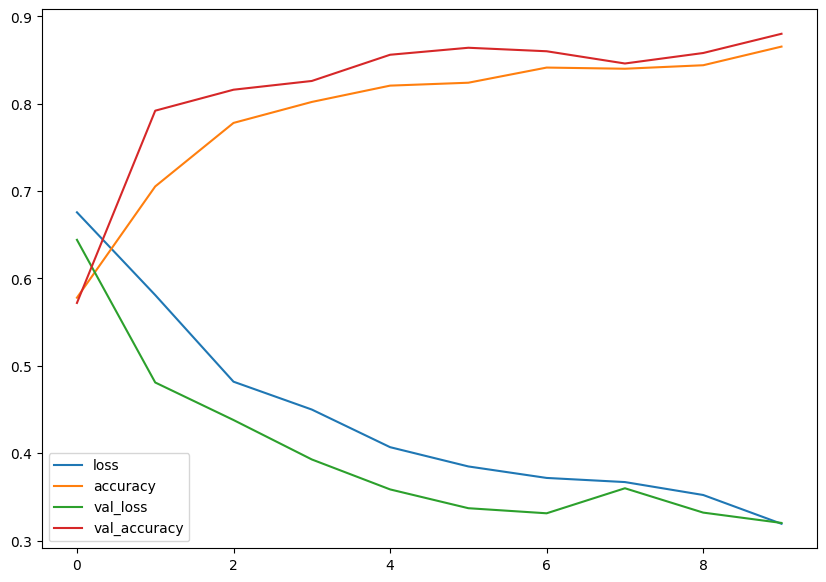

In [ ]:



# Create non-augmented new data batch size
print("Non-augmented training images:")
train_data_b64 = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=64,
                                               class_mode='binary',
                                               shuffle=True)
print("Unchanged test images:")
test_data_b64 = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=64,
                                             class_mode='binary')



model_10 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])


# Compile the model
model_10.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])


history_10 = model_10.fit(train_data_b64,
                        epochs=10,
                        steps_per_epoch=len(train_data_b64),
                        validation_data=test_data_b64,
                        validation_steps=len(test_data_b64))

pd.DataFrame(history_10.history).plot(figsize=(10,7))

In [ ]:
# Go back to the augmented image dataset but try using a different batch size


train_data_augmented_b64 = train_datagen_augmented.flow_from_directory(train_dir,
                                               batch_size=64,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               shuffle=True)

# Create non-augmented data batches
print("Non-augmented training images:")
train_data_b64 = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=64,
                                               class_mode='binary',
                                               shuffle=True)

print("Unchanged test images:")
test_data_b64 = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=64,
                                             class_mode='binary')



Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


Epoch 1/10
24/24 [==============================] - 25s 1s/step - loss: 0.6650 - accuracy: 0.6013 - val_loss: 0.5655 - val_accuracy: 0.7020
Epoch 2/10
24/24 [==============================] - 21s 875ms/step - loss: 0.6155 - accuracy: 0.6773 - val_loss: 0.5013 - val_accuracy: 0.7840
Epoch 3/10
24/24 [==============================] - 22s 937ms/step - loss: 0.5425 - accuracy: 0.7300 - val_loss: 0.4014 - val_accuracy: 0.8460
Epoch 4/10
24/24 [==============================] - 24s 1s/step - loss: 0.4864 - accuracy: 0.7740 - val_loss: 0.4893 - val_accuracy: 0.7480
Epoch 5/10
24/24 [==============================] - 22s 925ms/step - loss: 0.4946 - accuracy: 0.7647 - val_loss: 0.4230 - val_accuracy: 0.8080
Epoch 6/10
24/24 [==============================] - 22s 919ms/step - loss: 0.4579 - accuracy: 0.7960 - val_loss: 0.3454 - val_accuracy: 0.8640
Epoch 7/10
24/24 [==============================] - 22s 912ms/step - loss: 0.4602 - accuracy: 0.7907 - val_loss: 0.4503 - val_accuracy: 0.7740
Epoch

<Axes: >

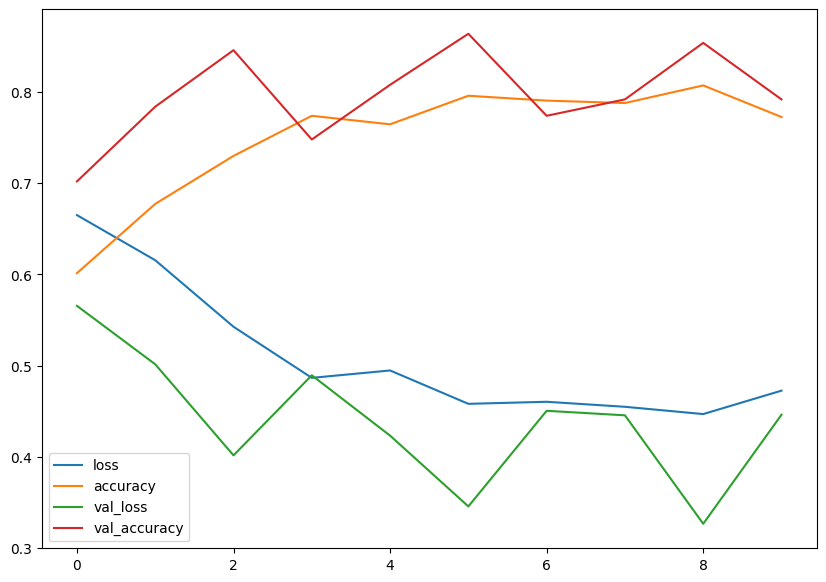

In [ ]:
model_11 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])


# Compile the model
model_11.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])


history_11 = model_11.fit(train_data_augmented_b64,
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented_b64),
                        validation_data=test_data_b64,
                        validation_steps=len(test_data_b64))

pd.DataFrame(history_11.history).plot(figsize=(10,7))

Epoch 1/10
24/24 [==============================] - 32s 1s/step - loss: 0.7175 - accuracy: 0.5727 - val_loss: 0.6168 - val_accuracy: 0.7600
Epoch 2/10
24/24 [==============================] - 30s 1s/step - loss: 0.5906 - accuracy: 0.7053 - val_loss: 0.4525 - val_accuracy: 0.8120
Epoch 3/10
24/24 [==============================] - 27s 1s/step - loss: 0.5582 - accuracy: 0.7147 - val_loss: 0.4605 - val_accuracy: 0.8020
Epoch 4/10
24/24 [==============================] - 23s 977ms/step - loss: 0.5231 - accuracy: 0.7407 - val_loss: 0.3937 - val_accuracy: 0.8520
Epoch 5/10
24/24 [==============================] - 23s 984ms/step - loss: 0.5025 - accuracy: 0.7727 - val_loss: 0.4695 - val_accuracy: 0.7820
Epoch 6/10
24/24 [==============================] - 25s 1s/step - loss: 0.4666 - accuracy: 0.7913 - val_loss: 0.3716 - val_accuracy: 0.8480
Epoch 7/10
24/24 [==============================] - 23s 974ms/step - loss: 0.4800 - accuracy: 0.7720 - val_loss: 0.3703 - val_accuracy: 0.8560
Epoch 8/10


<Axes: >

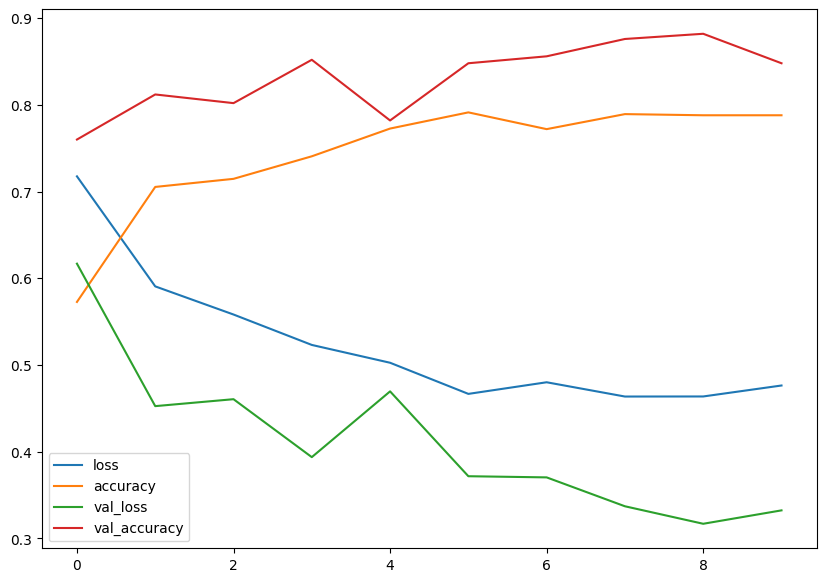

In [ ]:
model_12 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])


# Compile the model
model_12.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])


history_12 = model_12.fit(train_data_augmented_b64,
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented_b64),
                        validation_data=test_data_b64,
                        validation_steps=len(test_data_b64))

pd.DataFrame(history_12.history).plot(figsize=(10,7))


In [ ]:
# Summary
summary_table =  pd.DataFrame(columns=['Model','Loss','Accuracy','val_Loss','val_Accuracy'])
summary_table.loc[0] = ['model_1', history_1.history['loss'][4], history_1.history['accuracy'][4], history_1.history['val_loss'][4], history_1.history['val_accuracy'][4]]
summary_table.loc[1] = ['model_2', history_2.history['loss'][4], history_2.history['accuracy'][4], history_2.history['val_loss'][4], history_2.history['val_accuracy'][4]]
summary_table.loc[2] = ['model_3 = model_2+augdata', history_3.history['loss'][4], history_3.history['accuracy'][4], history_3.history['val_loss'][4], history_3.history['val_accuracy'][4]]
summary_table.loc[3] = ['model_4 = model_2+augdata_shuffled', history_4.history['loss'][4], history_4.history['accuracy'][4], history_4.history['val_loss'][4], history_4.history['val_accuracy'][4]]
summary_table.loc[4] = ['model_5 = model_1+augdata_shuffled', history_5.history['loss'][4], history_5.history['accuracy'][4], history_5.history['val_loss'][4], history_5.history['val_accuracy'][4]]
summary_table.loc[5] = ['model_6 = model_6+augdata_shuffled', history_6.history['loss'][4], history_6.history['accuracy'][4], history_6.history['val_loss'][4], history_6.history['val_accuracy'][4]]
summary_table.loc[6] = ['model_7 = model_6 + lr= 0.002', history_7.history['loss'][4], history_7.history['accuracy'][4], history_7.history['val_loss'][4], history_7.history['val_accuracy'][4]]
summary_table.loc[7] = ['model_8 = model_4 + lr= 0.002', history_8.history['loss'][4], history_8.history['accuracy'][4], history_8.history['val_loss'][4], history_8.history['val_accuracy'][4]]
summary_table.loc[8] = ['model_9 = model_4 for 10 epochs', history_9.history['loss'][4], history_9.history['accuracy'][4], history_9.history['val_loss'][4], history_9.history['val_accuracy'][4]]
summary_table.loc[9] = ['model_10 = model_2 with batch_size 64 for 10epochs ', history_10.history['loss'][4], history_10.history['accuracy'][4], history_10.history['val_loss'][4], history_10.history['val_accuracy'][4]]
summary_table.loc[10] = ['model_11 =  model_4 with batch_size 64 for 10epochs', history_11.history['loss'][4], history_11.history['accuracy'][4], history_11.history['val_loss'][4], history_11.history['val_accuracy'][4]]
summary_table.loc[11] = ['model_12 =  model_5 with batch_size 64 for 10epochs', history_12.history['loss'][4], history_12.history['accuracy'][4], history_12.history['val_loss'][4], history_12.history['val_accuracy'][4]]
summary_table

,Model,Loss,Accuracy,val_Loss,val_Accuracy
0,model_1,0.358238,0.851333,0.360690,0.850
1,model_2,0.396211,0.833333,0.346508,0.838
2,model_3 = model_2+augdata,0.691681,0.587333,0.671109,0.738
3,model_4 = model_2+augdata_shuffled,0.479646,0.776000,0.361348,0.818
4,model_5 = model_1+augdata_shuffled,0.426683,0.816667,0.314582,0.860
5,model_6 = model_6+augdata_shuffled,0.468947,0.796000,0.361507,0.852
6,model_7 = model_6 + lr= 0.002,0.497543,0.773333,0.360268,0.872
7,model_8 = model_4 + lr= 0.002,0.463267,0.803333,0.348199,0.862
8,model_9 = model_4 for 10 epochs,0.504346,0.766667,0.400130,0.820
9,model_10 = model_2 with batch_size 64 for 10ep...,0.406957,0.820667,0.358628,0.856


# Making Predictions - using model_10
 Function to import and resize images so these can be used by the model

In [ ]:
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
steak_1 = load_and_prep_image("/content/pizza_steak/test/steak/1012080.jpg")
steak_1 = tf.expand_dims(steak_1, axis=0)


In [ ]:
pred = model_10.predict(steak_1 )

1/1 [==============================] - 0s 175ms/step


In [ ]:
# Predict class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 20ms/step


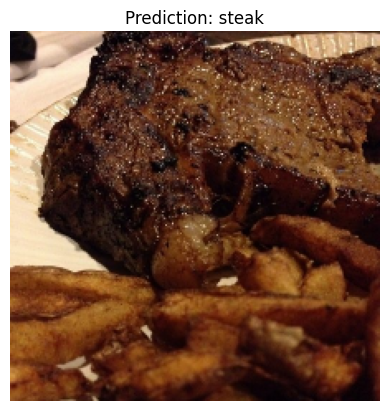

In [ ]:
pred_and_plot(model_11, "/content/pizza_steak/test/steak/1012080.jpg", class_names)

## Multiclass Image Classification with CNN

In [2]:
import zipfile

# Download zip file of 10_food_classes images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-12-28 13:49:06--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.99.207, 173.194.202.207, 74.125.197.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.99.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  76.0MB/s    in 7.1s    

2023-12-28 13:49:13 (69.7 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [3]:

import os

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.

In [4]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (512, 512, 3)


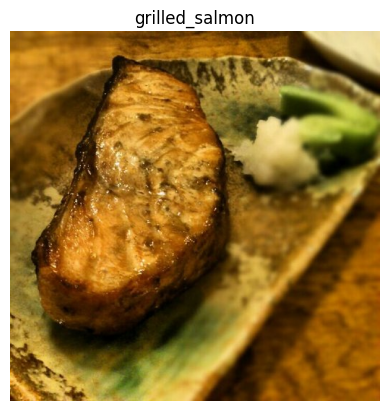

In [ ]:
# View a random image from the training dataset
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names)) # get a random class name

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense


# Create an initial model
model_13 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_13.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [ ]:
# Fit the model
history_13 = model_13.fit(train_data, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 36s 148ms/step - loss: 2.1809 - accuracy: 0.1908 - val_loss: 2.0686 - val_accuracy: 0.2668
Epoch 2/5
235/235 [==============================] - 31s 131ms/step - loss: 1.8478 - accuracy: 0.3655 - val_loss: 1.8967 - val_accuracy: 0.3384
Epoch 3/5
235/235 [==============================] - 35s 150ms/step - loss: 1.2864 - accuracy: 0.5792 - val_loss: 2.1599 - val_accuracy: 0.3272
Epoch 4/5
235/235 [==============================] - 33s 139ms/step - loss: 0.5972 - accuracy: 0.8096 - val_loss: 2.9071 - val_accuracy: 0.2776
Epoch 5/5
235/235 [==============================] - 31s 133ms/step - loss: 0.1914 - accuracy: 0.9487 - val_loss: 4.3915 - val_accuracy: 0.2624


In [ ]:
model_13.evaluate(test_data)

79/79 [==============================] - 14s 175ms/step - loss: 4.3915 - accuracy: 0.2624


[4.391520977020264, 0.2624000012874603]

<Axes: >

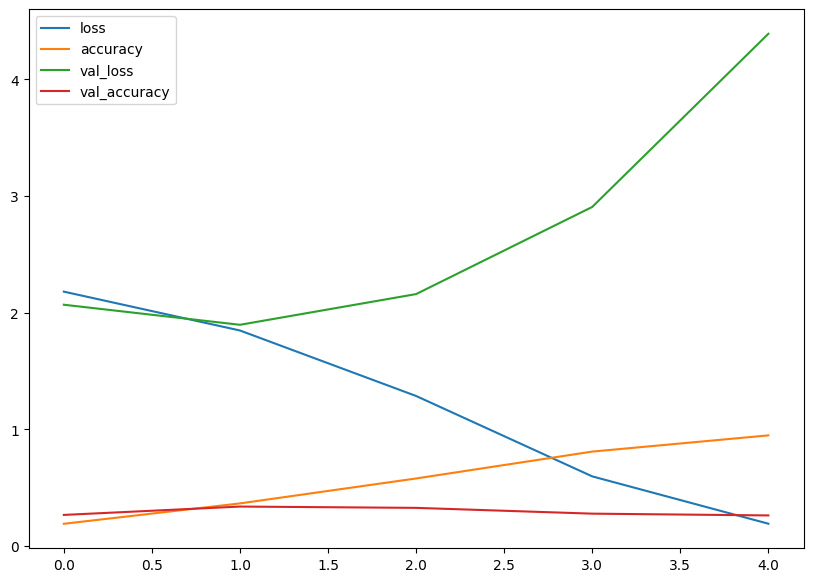

In [ ]:
pd.DataFrame(history_13.history).plot(figsize=(10,7))

In [ ]:
# overfitting

# try simplifying the model

model_14 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

# Compile the model
model_14.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_14 = model_14.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

model_14.evaluate(test_data)



Epoch 1/5
235/235 [==============================] - 37s 147ms/step - loss: 2.1386 - accuracy: 0.2505 - val_loss: 1.9064 - val_accuracy: 0.3288
Epoch 2/5
235/235 [==============================] - 29s 124ms/step - loss: 1.8049 - accuracy: 0.3833 - val_loss: 1.8454 - val_accuracy: 0.3512
Epoch 3/5
235/235 [==============================] - 31s 132ms/step - loss: 1.5433 - accuracy: 0.4928 - val_loss: 1.9153 - val_accuracy: 0.3448
Epoch 4/5
235/235 [==============================] - 33s 139ms/step - loss: 1.1418 - accuracy: 0.6351 - val_loss: 2.0119 - val_accuracy: 0.3312
Epoch 5/5
79/79 [==============================] - 7s 88ms/step - loss: 2.2515 - accuracy: 0.3356


[2.251451253890991, 0.33559998869895935]

<Axes: >

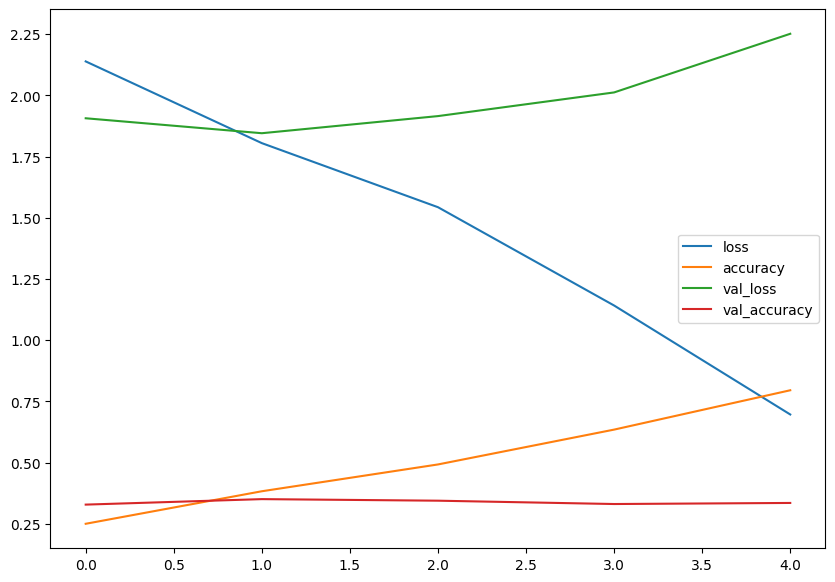

In [ ]:
pd.DataFrame(history_14.history).plot(figsize=(10,7))

In [6]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [ ]:
model_15 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

# Compile the model
model_15.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_15 = model_15.fit(train_data_augmented,
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/10
235/235 [==============================] - 129s 542ms/step - loss: 2.2080 - accuracy: 0.1753 - val_loss: 2.1228 - val_accuracy: 0.2048
Epoch 2/10
235/235 [==============================] - 111s 473ms/step - loss: 2.1220 - accuracy: 0.2191 - val_loss: 1.9950 - val_accuracy: 0.2828
Epoch 3/10
235/235 [==============================] - 111s 471ms/step - loss: 2.0790 - accuracy: 0.2560 - val_loss: 1.9287 - val_accuracy: 0.3224
Epoch 4/10
235/235 [==============================] - 112s 478ms/step - loss: 1.9928 - accuracy: 0.3031 - val_loss: 1.8195 - val_accuracy: 0.3760
Epoch 5/10
235/235 [==============================] - 110s 467ms/step - loss: 1.9472 - accuracy: 0.3165 - val_loss: 1.7850 - val_accuracy: 0.3912
Epoch 6/10
235/235 [==============================] - 108s 459ms/step - loss: 1.9197 - accuracy: 0.3264 - val_loss: 1.7958 - val_accuracy: 0.3912
Epoch 7/10
235/235 [==============================] - 112s 475ms/step - loss: 1.8955 - accuracy: 0.3428 - val_loss: 1.7240 -

In [ ]:
model_15.evaluate(test_data)

79/79 [==============================] - 7s 82ms/step - loss: 1.6303 - accuracy: 0.4416


[1.6303483247756958, 0.4415999948978424]

<Axes: >

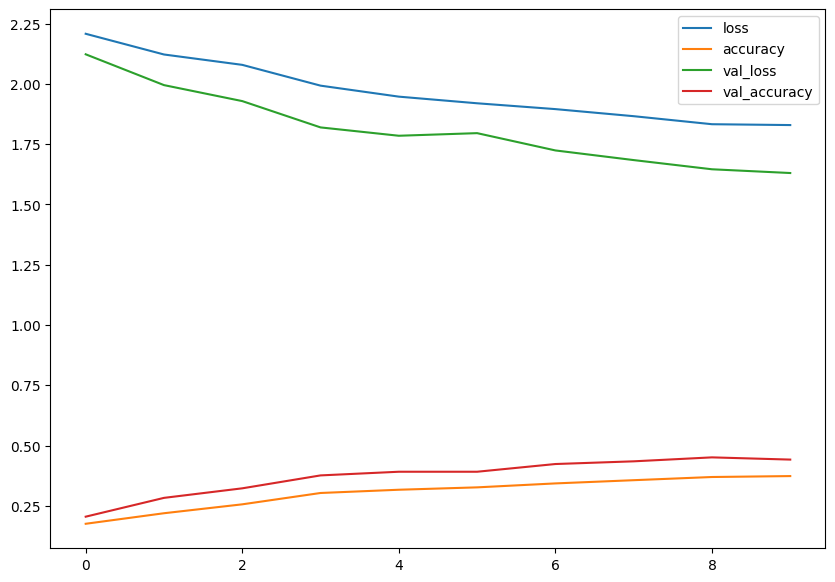

In [ ]:
pd.DataFrame(history_15.history).plot(figsize=(10,7))


Using augmented data reduced overfitting and the metrics continued improving although slowly over the 10 epochs. Model is doing better on the validation set than on the training one, however it is still a poor model


In [7]:

# Try another basic CNN for image classification
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from keras.layers import BatchNormalization, Dropout

model_16 = Sequential([
  Conv2D(25, 5, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(50, 5, activation='relu'),
  MaxPool2D(),
  BatchNormalization(),
  Conv2D(70, 3, activation='relu'),
  MaxPool2D(),
  BatchNormalization(),
  Flatten(),
  Dense(100, activation='relu'),
  Dense(100, activation='relu'),
  Dropout(0.25),
  Dense(10, activation='softmax')
])

# Compile the model
model_16.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_16 = model_16.fit(train_data_augmented,
                        epochs=25,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/25
235/235 [==============================] - 122s 482ms/step - loss: 3.3515 - accuracy: 0.1423 - val_loss: 2.4037 - val_accuracy: 0.1116
Epoch 2/25
235/235 [==============================] - 108s 460ms/step - loss: 2.3347 - accuracy: 0.1527 - val_loss: 2.4997 - val_accuracy: 0.1500
Epoch 3/25
235/235 [==============================] - 110s 467ms/step - loss: 2.2630 - accuracy: 0.1595 - val_loss: 2.2717 - val_accuracy: 0.1504
Epoch 4/25
235/235 [==============================] - 110s 466ms/step - loss: 2.2130 - accuracy: 0.1843 - val_loss: 2.6326 - val_accuracy: 0.0928
Epoch 5/25
235/235 [==============================] - 116s 494ms/step - loss: 2.2212 - accuracy: 0.1705 - val_loss: 2.1479 - val_accuracy: 0.1900
Epoch 6/25
235/235 [==============================] - 116s 495ms/step - loss: 2.1684 - accuracy: 0.1967 - val_loss: 2.1577 - val_accuracy: 0.1940
Epoch 7/25
235/235 [==============================] - 111s 471ms/step - loss: 2.1402 - accuracy: 0.2229 - val_loss: 2.1702 -

<Axes: >

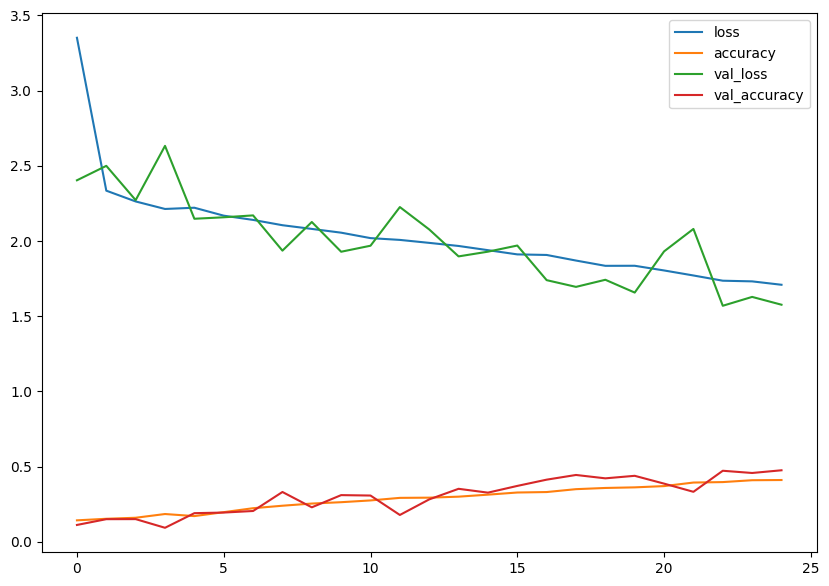

In [9]:
import pandas as pd
pd.DataFrame(history_16.history).plot(figsize=(10,7))


In [10]:
model_16.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 220, 220, 25)      1900      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 110, 110, 25)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 106, 106, 50)      31300     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 53, 53, 50)        0         
 g2D)                                                            
                                                                 
 batch_normalization_2 (Bat  (None, 53, 53, 50)        200       
 chNormalization)                                                
                                                      

In [ ]:
# after 25 epoch was still improving